# Importing Required Modules

In [1]:
# Import Neccessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Domain Knowledge


* `work_year [categorical]` : This represents the specific year in which the salary was disbursed. Different years may have different economic conditions which can impact the salary level.

* `experience_level [categorical]` : The level of experience a person holds in a particular job. This is a key determinant in salary calculation as typically, more experienced individuals receive higher pay due to their advanced skills and knowledge.

* `employment_type [categorical]` : The nature of the employment contract such as full-time, part-time, or contractual can greatly influence the salary. Full-time employees often have higher annual salaries compared to their part-time or contractual counterparts.

* `job_title [categorical]` : The role an individual holds within a company. Different roles have different salary scales based on the responsibilities and skills required. For example, managerial roles typically pay more than entry-level positions.

* `salary [numerical]` : The total gross salary paid to the individual. This is directly influenced by factors such as experience level, job title, and employment type.
    
* `salary_currency [categorical]` : The specific currency in which the salary is paid, denoted by an ISO 4217 code. Exchange rates could affect the value of the salary when converted into different currencies.

* `salary_in_usd [numerical]` : The total gross salary amount converted to US dollars. This allows for a uniform comparison of salaries across different countries and currencies.

* `employee_residence [categorical]`: The primary country of residence of the employee, denoted by an ISO 3166 code. The cost of living and prevailing wage rates in the employee's country of residence can impact salary levels.

* `remote_ratio [ratio]`: The proportion of work done remotely. With the rise of remote work, companies may adjust salaries based on the cost of living in the employee's location and the proportion of remote work.

* `company_location [categorical]`: The location of the employer's main office or the branch that holds the contract. Companies in different locations may offer different salary scales due to varying economic conditions and cost of living.

* `company_size [categorical]`: The median number of employees in the company during the work year. Larger companies often have structured salary scales and may offer higher salaries due to economies of scale and larger revenue streams.

In [5]:
#removing unneccssary columns
df.drop(['salary','salary_currency'],axis=1,inplace=True)

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [7]:
# Check Duplicates
duplicates = df.duplicated()

if duplicates.any():
    print("Duplicates found!")
    duplicate_rows = df[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found.")


Duplicates found!
      work_year experience_level employment_type           job_title  \
115        2023               SE              FT      Data Scientist   
123        2023               SE              FT  Analytics Engineer   
153        2023               MI              FT       Data Engineer   
154        2023               MI              FT       Data Engineer   
160        2023               SE              FT       Data Engineer   
...         ...              ...             ...                 ...   
3439       2022               MI              FT      Data Scientist   
3440       2022               SE              FT       Data Engineer   
3441       2022               SE              FT       Data Engineer   
3586       2021               MI              FT       Data Engineer   
3709       2021               MI              FT      Data Scientist   

      salary_in_usd employee_residence  remote_ratio company_location  \
115          150000                 US      

In [8]:
def des_analysis(dataframe):
    methods = {
        "shape": lambda: print(dataframe.shape),
        "columns": lambda: print(dataframe.columns),
        "info": lambda: print(dataframe.info()),
        "Descriptive": lambda: print(dataframe.describe()),
        "Null_values": lambda: print(dataframe.isnull().sum()),
        "Unique_Values": lambda: print(dataframe.nunique())
    }
    
    for method in methods:
        print(f"---------------------------- {method} ------------------------------------------\n")
        if method in methods:
            methods[method]()
            print("\n\n")
        

In [9]:
des_analysis(df)

---------------------------- shape ------------------------------------------

(3755, 9)



---------------------------- columns ------------------------------------------

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')



---------------------------- info ------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   com

# EDA(Exploratory Data Analysis)

In [11]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

**Here We can see there are 4 unique values which are:**

* SE - Senior level/Expert
* MI - Medium level/Intermediate
* EN - Entry level
* EX - Executive level

**Let's rename the values**

In [12]:
df['experience_level']=df['experience_level'].replace('SE','Senior level')
df['experience_level']=df['experience_level'].replace('MI','Intermediate level')
df['experience_level']=df['experience_level'].replace('EN','Entry level')
df['experience_level']=df['experience_level'].replace('EX','Executive level')

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior level,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Intermediate level,CT,ML Engineer,30000,US,100,US,S
2,2023,Intermediate level,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior level,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior level,FT,Data Scientist,120000,CA,100,CA,M


In [14]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

**It has 4 unique values which are :**
* FT - Full Time
* CT - Contract 
* FL - Freelance 
* PT - Part Time

**So Let's convert them**

In [15]:
df['employment_type']=df['employment_type'].replace('FT','Full Time')
df['employment_type']=df['employment_type'].replace('CT','Contract')
df['employment_type']=df['employment_type'].replace('FL','Freelance')
df['employment_type']=df['employment_type'].replace('PT','Part Time')

In [16]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior level,Full Time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Intermediate level,Contract,ML Engineer,30000,US,100,US,S
2,2023,Intermediate level,Contract,ML Engineer,25500,US,100,US,S
3,2023,Senior level,Full Time,Data Scientist,175000,CA,100,CA,M
4,2023,Senior level,Full Time,Data Scientist,120000,CA,100,CA,M


In [17]:
jobs=df['job_title'].value_counts()
jobs

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

**Here if We See above the most jobs equipped by professionals are Data Scientist,Data Engineer followed by Data Analyst and Machine Learning Engineer** 

**Let's Check top 15 Jobs**

In [18]:
top15_jobs=jobs[:15]
top15_jobs

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: job_title, dtype: int64

In [19]:
job_title=['Data Engineer','Data Scientist', 'Data Analyst','ML Engineer', 'Analytics Engineer','Data Architect','Research Scientist', 'DS Manager', 'Applied Scientist','Research Engineer', 'ML Enginer', 'Data Manager','ML Scientist','DS Consultant','DA Manager']
counts=np.array(top15_jobs)

In [20]:
counts

array([1040,  840,  612,  289,  103,  101,   82,   58,   58,   37,   34,
         29,   26,   24,   22])

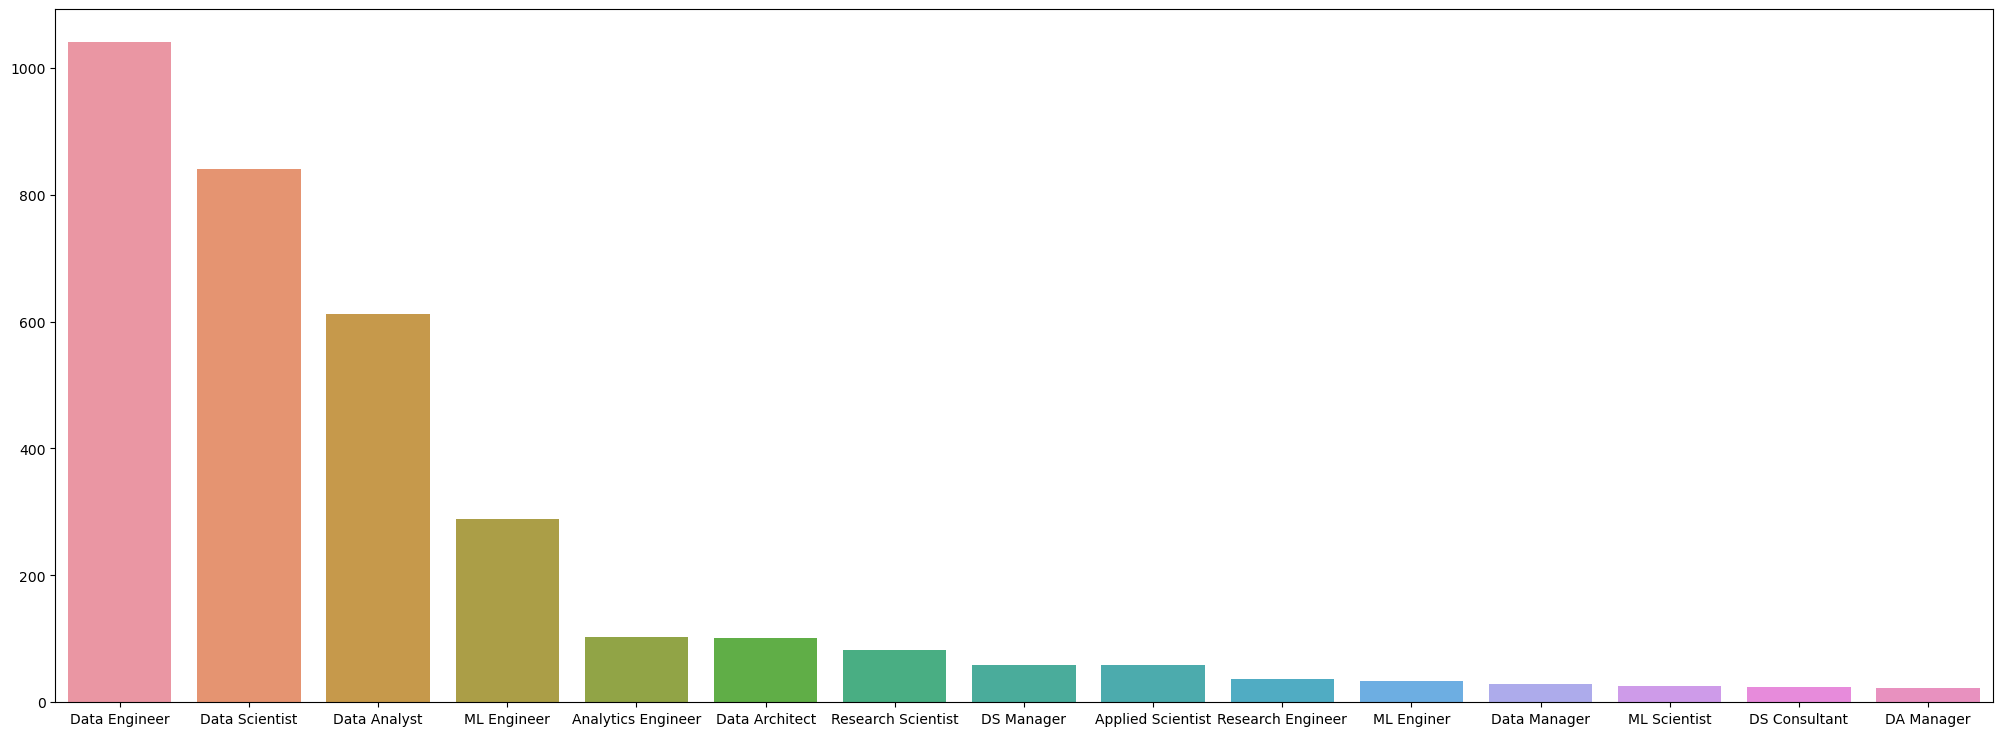

In [21]:
plt.figure(figsize=(25,9))
sns.barplot(x=job_title,y=counts)
plt.show()

**This Graph gives us insight that most people are having Data Engineer Job Role**

# Let's Explore Salaries based on other features

**Average Salaries Based On Job Titles**

In [22]:
df['salary_in_usd'].groupby(df['job_title']).mean()

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

**Maximum Salary Getting Job Role**

In [23]:
average_salary_by_job = df['salary_in_usd'].groupby(df['job_title']).mean()
max_avg_salary_job = average_salary_by_job.idxmax()


In [24]:
print("The Maxmimum Average sallary is of \"",max_avg_salary_job,"\" Which is ",average_salary_by_job["Data Science Tech Lead"])

The Maxmimum Average sallary is of " Data Science Tech Lead " Which is  375000.0


**Salaries based on Experiance level**

In [25]:
exp_wise_salary=np.array(df['salary_in_usd'].groupby(df['experience_level']).mean())

In [26]:
exp_wise_salary

array([ 78546.284375  , 194930.92982456, 104525.93913043, 153051.07154213])

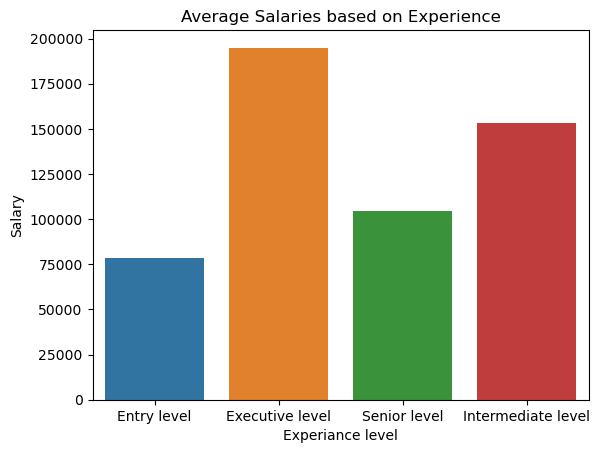

In [27]:
plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Entry level', 'Executive level', 'Senior level', 'Intermediate level'],y=exp_wise_salary)
plt.show()

**We Can Conclude here that Executive Level People get maximum salaries** 

**Salaries based on Employment Type**

In [28]:
df['salary_in_usd'].groupby(df['employment_type']).mean()

employment_type
Contract     113446.900000
Freelance     51807.800000
Full Time    138314.199570
Part Time     39533.705882
Name: salary_in_usd, dtype: float64

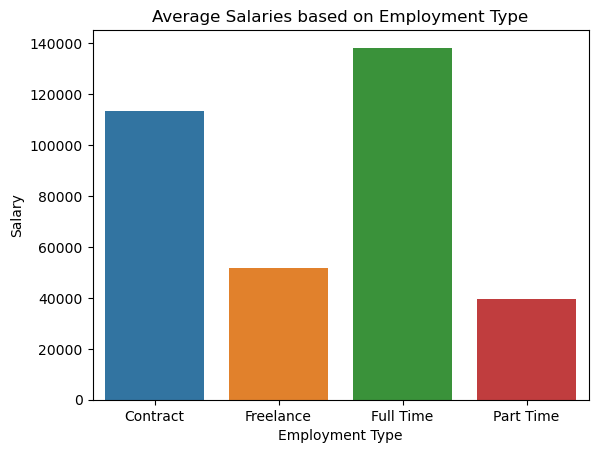

In [29]:
employ_wise_salary=np.array(df['salary_in_usd'].groupby(df['employment_type']).mean())
plt.title("Average Salaries based on Employment Type")
plt.xlabel('Employment Type')
plt.ylabel('Salary')
sns.barplot(x=['Contract', 'Freelance', 'Full Time', 'Part Time'],y=employ_wise_salary)
plt.show()

**Full Time Employees get more salary as compared to others**

**Salaries based on Remote ratio**

In [30]:
df['salary_in_usd'].groupby(df['remote_ratio']).mean()

remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64

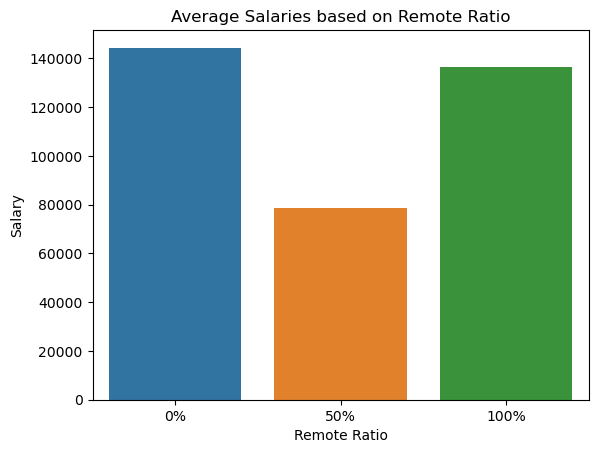

In [31]:
remote_wise_salary=np.array(df['salary_in_usd'].groupby(df['remote_ratio']).mean())
plt.title("Average Salaries based on Remote Ratio")
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
sns.barplot(x=['0%', '50%', '100%'],y=remote_wise_salary)
plt.show()

**We can see that those who doesn't do inoffice Jobs gets More Salary**

**Salaries based on Company Location**

In [32]:
df['salary_in_usd'].groupby(df['company_location']).mean()

company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64

**These are the Average salaries people get based on location**

**Salaries based on Company Size**

In [33]:
df['salary_in_usd'].groupby(df['company_size']).mean()

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

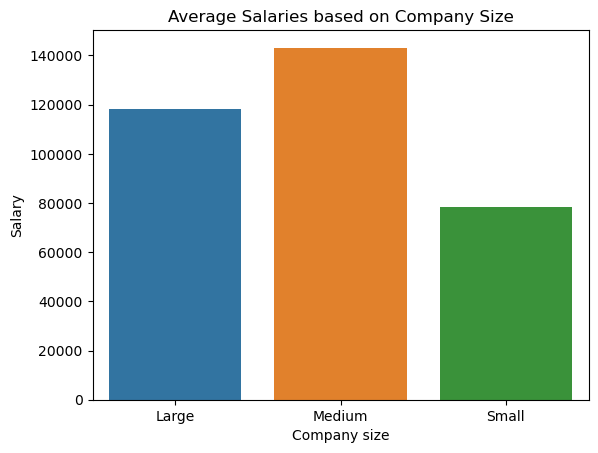

In [34]:
compsize_based_salary=np.array(df['salary_in_usd'].groupby(df['company_size']) .mean())
compsize_based_title=['Large', 'Medium', 'Small']
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x=compsize_based_title,y=compsize_based_salary)
plt.show()

**We Can see that Medium size companies gives more salary**

**Salaries based on work years**

In [35]:
df['salary_in_usd'].groupby(df['work_year']).mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

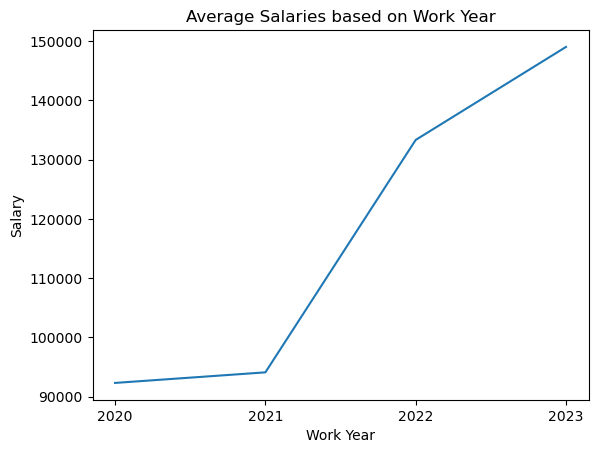

In [36]:
year_based_salary=np.array(df['salary_in_usd'].groupby(df['work_year']).mean())
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

**The salaries of data science fields goes on increasing with time as the amount of data generated by community is increasing rapidly**

**No of Jobs based on other features**

**No of jobs based on Experiance level**

In [37]:
df['experience_level'].value_counts()

Senior level          2516
Intermediate level     805
Entry level            320
Executive level        114
Name: experience_level, dtype: int64

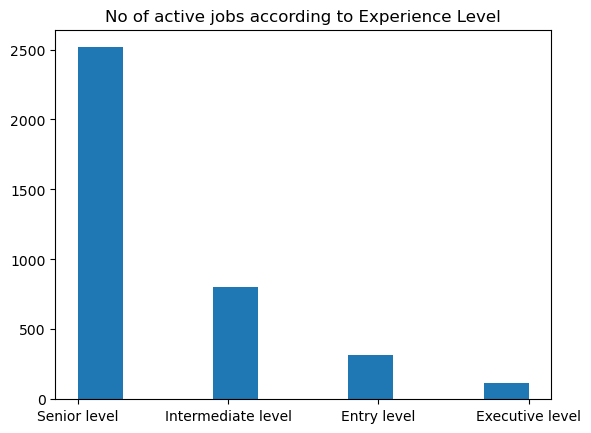

In [38]:
plt.title('No of active jobs according to Experience Level')
df['experience_level'].hist(grid=False)
plt.show()

**Here we Conclude that Senior Level Experience people likely to have more jobs**

**No of jobs based on Employment type**

In [39]:
df['employment_type'].value_counts()

Full Time    3718
Part Time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

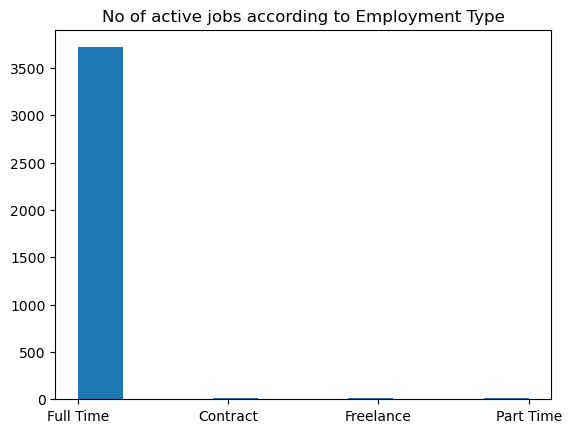

In [40]:
plt.title('No of active jobs according to Employment Type')
df['employment_type'].hist(grid=False)
plt.show()

**No of jobs based on Company Size**

In [41]:
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

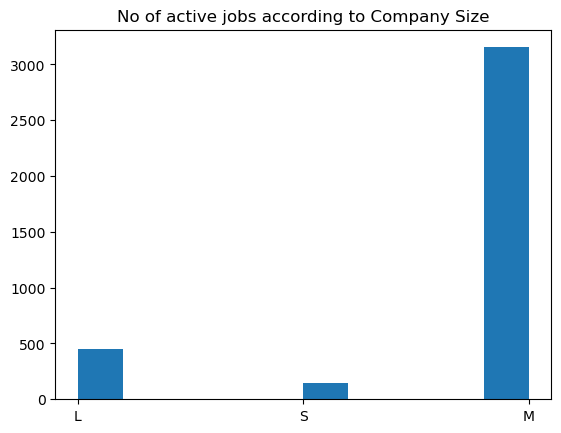

In [42]:
plt.title('No of active jobs according to Company Size')
df['company_size'].hist(grid=False)
plt.show()

**No of jobs based on Company Location**

In [43]:
df['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

**No of jobs based on Work Year**

In [44]:
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [45]:
work_year_count=list(df['work_year'].value_counts())
work_year_count.reverse()

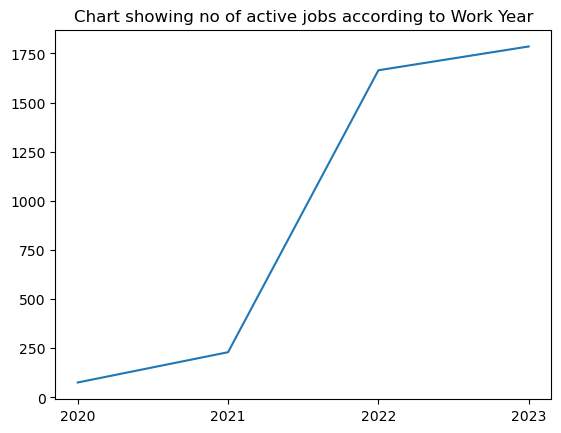

In [46]:
plt.title('Chart showing no of active jobs according to Work Year')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=work_year_count)
plt.show()

**No of jobs related to data science field goes on increasing with time to time**

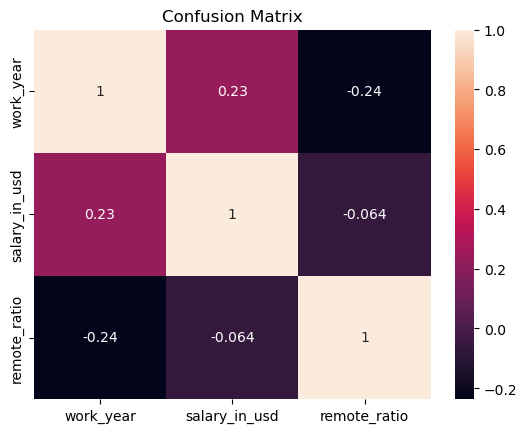

In [47]:
plt.title("Confusion Matrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

**This Confusion Matrix shows that as year passes the salaries are increasing**

# **Thank You**
_project by **Rishu Raj Gautam**_